In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
train_values = pd.read_csv('train_values.csv', dtype= {'building_id': np.int32,\
                                              'geo_level_1_id': np.int8,\
                                              'geo_level_2_id': np.int16,\
                                              'geo_level_3_id': np.int16,\
                                              'count_floors_pre_eq': np.int16,\
                                              'age': np.int16,\
                                              'area_percentage': np.int8,\
                                              'height_percentage': np.int8,\
                                              'land_surface_condition': 'category',\
                                              'foundation_type': 'category',\
                                              'roof_type': 'category',\
                                              'ground_floor_type':'category',\
                                              'other_floor_type': 'category',\
                                              'position': 'category',\
                                              'plan_configuration':'category',\
                                              'has_superstructure_adobe_mud':'boolean',\
                                              'has_superstructure_mud_mortar_stone':'boolean',\
                                              'has_superstructure_stone_flag':'boolean',\
                                              'has_superstructure_cement_mortar_stone':'boolean',\
                                              'has_superstructure_mud_mortar_brick':'boolean',\
                                              'has_superstructure_cement_mortar_brick':'boolean',\
                                              'has_superstructure_timber':'boolean',\
                                              'has_superstructure_bamboo':'boolean',\
                                              'has_superstructure_rc_non_engineered':'boolean',\
                                              'has_superstructure_rc_engineered':'boolean',\
                                              'has_superstructure_other':'boolean',\
                                              'legal_ownership_status':'category',\
                                              'count_families': np.int16,\
                                              'has_secondary_use':'boolean',\
                                              'has_secondary_use_agriculture':'boolean',\
                                              'has_secondary_use_hotel':'boolean',\
                                              'has_secondary_use_rental':'boolean',\
                                              'has_secondary_use_institution':'boolean',\
                                              'has_secondary_use_school':'boolean',\
                                              'has_secondary_use_industry':'boolean',\
                                              'has_secondary_use_health_post':'boolean',\
                                              'has_secondary_use_gov_office':'boolean',\
                                              'has_secondary_use_use_police':'boolean',\
                                              'has_secondary_use_other':'boolean'
                                              })
train_labels = pd.read_csv("train_labels.csv")
test_values = pd.read_csv("test_values.csv")


In [2]:
adropear = ['has_secondary_use_agriculture','has_secondary_use_hotel',
            'has_secondary_use_rental','has_secondary_use_institution',
           'has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
            'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other',
            'has_superstructure_bamboo']
train_values.drop(columns = adropear, inplace = True)

In [3]:
columns_importances = ["geo_level_1_id",
"geo_level_2_id",
"has_superstructure_mud_mortar_stone",
"geo_level_3_id",
"foundation_type_r",
"volume_percentage",
"other_floor_type_q",
"has_superstructure_cement_mortar_brick",
"age",   
"has_superstructure_timber",
"foundation_type_i",
"roof_type_n",
"roof_type_x",
"ground_floor_type_f",
"roof_type_q",
"has_secondary_use",
"has_superstructure_mud_mortar_brick",
"has_superstructure_adobe_mud",
"other_floor_type_x",
"has_superstructure_stone_flag",
"position_s",
"ground_floor_type_v",
"building_id"]


In [4]:
#PROBANDO REMOVER OUTLIERS para AGE

C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

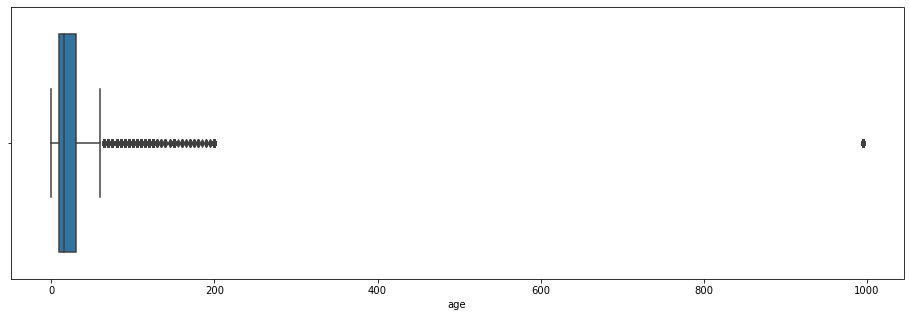

In [5]:
plt.figure(figsize=(16,5))

sns.boxplot(train_values['age'])


In [6]:
prueba = train_values.loc[:,'age']
prueba.value_counts()
#df.loc[df.loc[:, 'sex'] == 'Male']

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [7]:
percentile25 = train_values['age'].quantile(0.25)
percentile75 = train_values['age'].quantile(0.90)

In [8]:
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

In [9]:
train_values[train_values['age'] > upper_limit]
train_values[train_values['age'] < upper_limit]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,v,1,False
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,v,1,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,True,False,False,False,v,1,False
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,v,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,v,1,False
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,v,1,False
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,True,False,False,False,False,v,1,False


In [10]:
new_train_values = train_values[train_values['age'] < upper_limit]
new_train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,v,1,False
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,v,1,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,True,False,False,False,v,1,False
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,v,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,v,1,False
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,v,1,False
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,True,False,False,False,False,v,1,False


C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

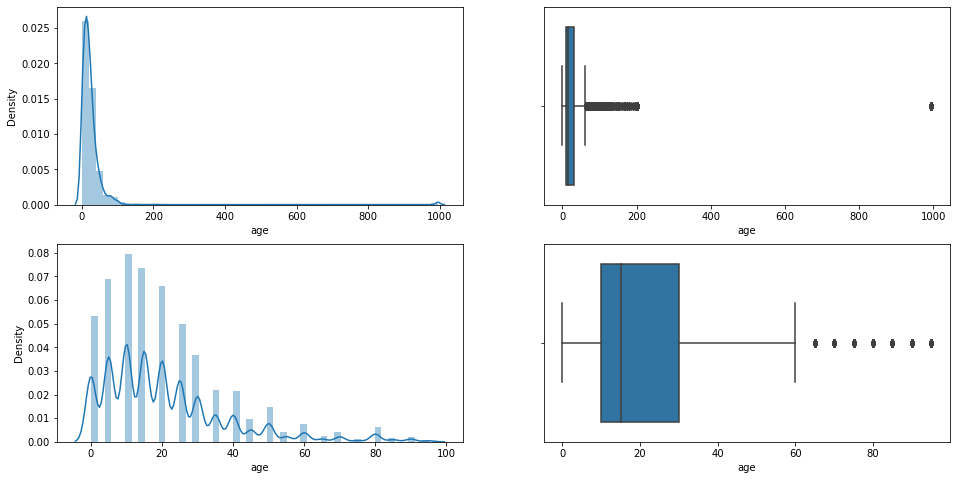

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train_values['age'])
plt.subplot(2,2,2)
sns.boxplot(train_values['age'])
plt.subplot(2,2,3)
sns.distplot(new_train_values['age'])
plt.subplot(2,2,4)
sns.boxplot(new_train_values['age'])
plt.show()

In [12]:
new_train_values_cap = train_values.copy()
new_train_values_cap['age'] = np.where(
    new_train_values_cap['age'] > upper_limit,
    upper_limit,
    np.where(
        new_train_values_cap['age'] < lower_limit,
        lower_limit,
        new_train_values_cap['age']
    )
)

C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

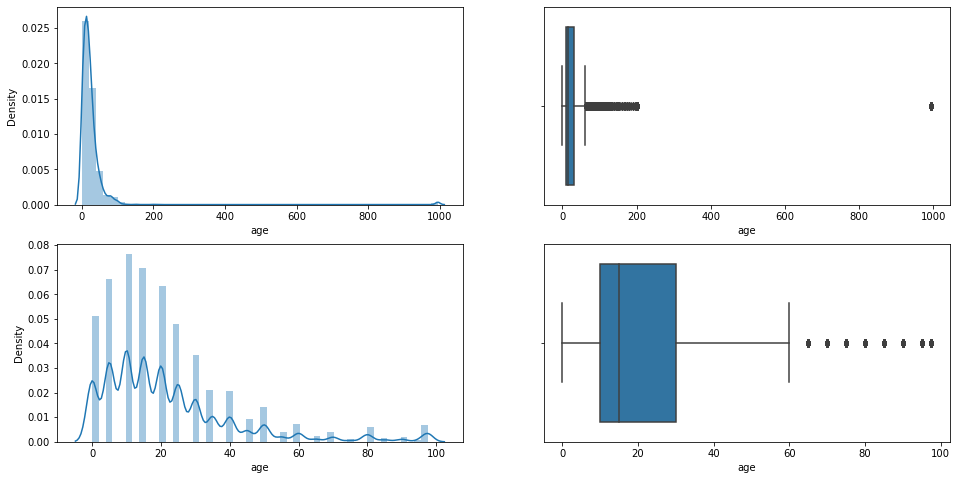

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train_values['age'])
plt.subplot(2,2,2)
sns.boxplot(train_values['age'])
plt.subplot(2,2,3)
sns.distplot(new_train_values_cap['age'])
plt.subplot(2,2,4)
sns.boxplot(new_train_values_cap['age'])
plt.show()

In [14]:
#Probando otra forma de outlier

In [15]:
#sns.distplot(train_values['age'])

In [16]:
#sns.boxplot(train_values['age'])

In [17]:
#upper_limit = train_values['age'].quantile(0.99)
#lower_limit = train_values['age'].quantile(0.01)

In [18]:
#train_values['age'] = np.where(train_values['age'] >= upper_limit,
 #       upper_limit,
  #      np.where(train_values['age'] <= lower_limit,
   #     lower_limit,
    #    train_values['age']))

In [19]:
#sns.distplot(train_values['age'])
#sns.boxplot(train_values['age'])

In [20]:
#Para todos los feauteres

In [21]:
#A estas les sacamos outliers
train_values_copy_1 = train_values.set_index('building_id').loc[:,['age', 'area_percentage', 'height_percentage','count_families']]
train_values_copy_1

,age,area_percentage,height_percentage,count_families
building_id,,,,
802906,30,6,5,1
28830,10,8,7,1
94947,10,5,5,1
590882,10,6,5,1
201944,30,8,9,1
...,...,...,...,...
688636,55,6,3,1
669485,0,6,5,1
602512,55,6,7,1


In [22]:
train_values_copy_1['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [23]:
new_train_values_cap


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,802906,6,487,12198,2,30.0,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
1,28830,8,900,2812,2,10.0,8,7,o,r,...,False,False,False,False,False,False,False,v,1,False
2,94947,21,363,8973,2,10.0,5,5,t,r,...,False,False,False,False,False,False,False,v,1,False
3,590882,22,418,10694,2,10.0,6,5,t,r,...,False,False,False,True,False,False,False,v,1,False
4,201944,11,131,1488,3,30.0,8,9,t,r,...,False,False,False,False,False,False,False,v,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55.0,6,3,n,r,...,False,False,False,False,False,False,False,v,1,False
260597,669485,17,715,2060,2,0.0,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
260598,602512,17,51,8163,3,55.0,6,7,t,r,...,False,False,False,False,False,False,False,v,1,False
260599,151409,26,39,1851,2,10.0,14,6,t,r,...,False,False,True,False,False,False,False,v,1,False


In [24]:
new_train_values_cap['age'].value_counts()

10.0    38896
15.0    36010
5.0     33697
20.0    32182
0.0     26041
25.0    24366
30.0    18028
35.0    10710
40.0    10559
50.0     7257
45.0     4711
60.0     3612
97.5     3488
80.0     3055
55.0     2033
70.0     1975
65.0     1123
90.0     1085
85.0      847
75.0      512
95.0      414
Name: age, dtype: int64

In [25]:
#AREA
train_filter_area = train_values.copy()
percentile25 = train_filter_area['area_percentage'].quantile(0.25)
percentile75 = train_filter_area['area_percentage'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)
temp = train_filter_area[train_filter_area['area_percentage'] < upper_limit]
new_train_values_area = temp[train_filter_area['area_percentage'] > lower_limit]
new_train_values_area

<ipython-input-25-7602c9c15129>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_train_values_area = temp[train_filter_area['area_percentage'] > lower_limit]


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,v,1,False
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,v,1,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,True,False,False,False,v,1,False
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,v,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,v,1,False
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,v,1,False
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,True,False,False,False,False,v,1,False


C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

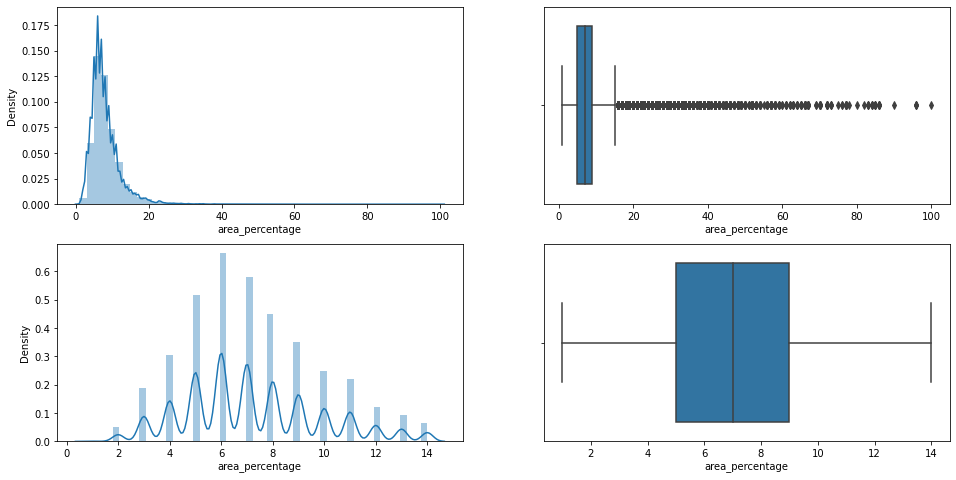

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train_values['area_percentage'])
plt.subplot(2,2,2)
sns.boxplot(train_values['area_percentage'])
plt.subplot(2,2,3)
sns.distplot(new_train_values_area['area_percentage'])
plt.subplot(2,2,4)
sns.boxplot(new_train_values_area['area_percentage'])
plt.show()

In [27]:
#Height

In [28]:
train_filter_height = train_values.copy()
percentile25 = train_filter_height['height_percentage'].quantile(0.25)
percentile75 = train_filter_height['height_percentage'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)
temp = train_filter_height[train_filter_height['height_percentage'] < upper_limit]
new_train_values_height = temp[train_filter_height['height_percentage'] > lower_limit]
new_train_values_height

<ipython-input-28-dc2e6943f576>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_train_values_height = temp[train_filter_height['height_percentage'] > lower_limit]


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,v,1,False
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,v,1,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,True,False,False,False,v,1,False
5,333020,8,558,6089,2,10,9,5,t,r,...,False,False,False,False,False,False,False,v,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,v,1,False
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,v,1,False
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,True,False,False,False,False,v,1,False


C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jpdic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

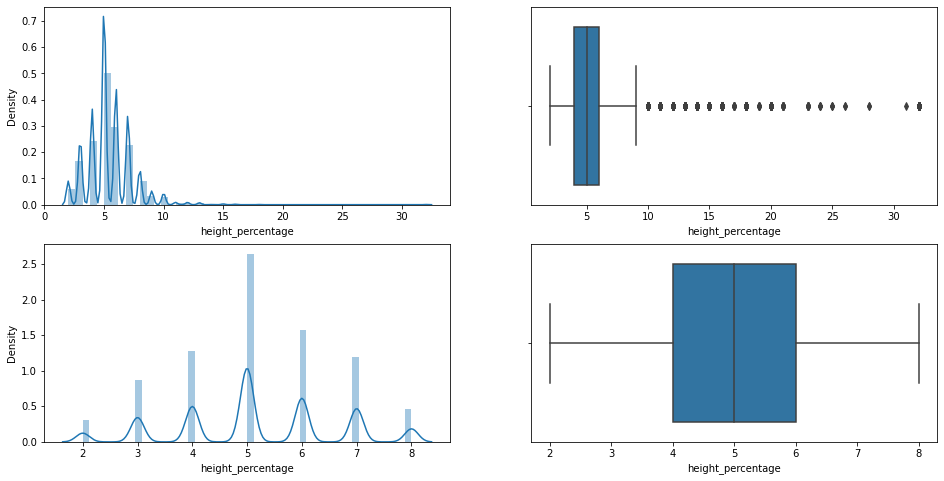

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train_values['height_percentage'])
plt.subplot(2,2,2)
sns.boxplot(train_values['height_percentage'])
plt.subplot(2,2,3)
sns.distplot(new_train_values_height['height_percentage'])
plt.subplot(2,2,4)
sns.boxplot(new_train_values_height['height_percentage'])
plt.show()

In [30]:
new_building_id =pd.Series(list(((set(new_train_values_area["building_id"])\
                                .intersection(set(new_train_values_height["building_id"])))\
                               .intersection(set(new_train_values_cap["building_id"])))))
new_building_id

0               4
1         1048583
2               8
3              12
4          524301
           ...   
233472    1048562
233473     524275
233474     524280
233475    1048570
233476    1048572
Length: 233477, dtype: int64

In [31]:
building_frame = new_building_id.to_frame().rename(columns = {0:"building_id"})
building_frame

,building_id
0,4
1,1048583
2,8
3,12
4,524301
...,...
233472,1048562
233473,524275
233474,524280
233475,1048570


In [32]:
train_filtered = building_frame.merge(train_values,on = "building_id")


In [33]:
train_filtered


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,4,30,266,1224,1,25,5,2,t,r,...,False,False,False,False,False,False,False,v,0,False
1,1048583,10,417,6188,1,10,7,2,t,r,...,False,False,False,False,False,False,False,v,1,False
2,8,17,409,12182,2,0,13,7,t,r,...,False,False,False,False,False,False,False,v,1,False
3,12,17,716,7056,2,5,12,6,o,r,...,False,False,False,False,False,False,False,v,1,False
4,524301,0,885,11635,2,20,6,5,t,r,...,False,False,False,False,False,False,False,v,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233472,1048562,0,664,3706,2,20,7,6,t,r,...,False,False,False,False,False,False,False,v,1,False
233473,524275,24,1388,9315,2,35,8,4,t,r,...,True,False,False,False,False,False,False,v,1,False
233474,524280,6,1041,10683,2,0,5,5,t,i,...,False,False,False,False,True,False,False,v,1,False
233475,1048570,27,548,10720,3,10,8,5,t,r,...,False,False,False,False,False,False,False,v,1,True


In [34]:
train_filtered['volume_percentage']=train_values['area_percentage']* train_values['height_percentage']


In [35]:
train_droped = train_filtered.drop(columns = ["area_percentage",'height_percentage'])

In [36]:
train_droped

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,volume_percentage
0,4,30,266,1224,1,25,t,r,n,f,...,False,False,False,False,False,False,v,0,False,30
1,1048583,10,417,6188,1,10,t,r,n,f,...,False,False,False,False,False,False,v,1,False,56
2,8,17,409,12182,2,0,t,r,n,f,...,False,False,False,False,False,False,v,1,False,25
3,12,17,716,7056,2,5,o,r,q,f,...,False,False,False,False,False,False,v,1,False,30
4,524301,0,885,11635,2,20,t,r,n,x,...,False,False,False,False,False,False,v,1,False,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233472,1048562,0,664,3706,2,20,t,r,n,f,...,False,False,False,False,False,False,v,1,False,10
233473,524275,24,1388,9315,2,35,t,r,n,x,...,False,False,False,False,False,False,v,1,False,15
233474,524280,6,1041,10683,2,0,t,i,x,v,...,False,False,False,True,False,False,v,1,False,60
233475,1048570,27,548,10720,3,10,t,r,n,f,...,False,False,False,False,False,False,v,1,True,35


In [37]:
train_labels_filtered = train_labels.merge(building_frame,on = "building_id")
train_labels_filtered

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,333020,2
...,...,...
233472,688636,2
233473,669485,3
233474,602512,3
233475,151409,2


In [38]:
x_pre = pd.get_dummies(train_droped).set_index('building_id')
y_pre = train_labels_filtered.loc[:,'damage_grade']

x = x_pre
y = y_pre
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
"""rf = RandomForestClassifier(min_samples_split= 20, n_estimators=500)
model = rf.fit(x_train, y_train)

model.predict(x_test)
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))"""

'rf = RandomForestClassifier(min_samples_split= 20, n_estimators=500)\nmodel = rf.fit(x_train, y_train)\n\nmodel.predict(x_test)\nprint("Training Score: {}".format(rf.score(x_train, y_train)))\nprint("Test Score: {}".format(rf.score(x_test, y_test)))'

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
hiper = {"class_weight":['balanced'], "n_jobs":[-1], "n_estimators":np.arange(100,1000,100),
         "max_features" :['auto', 'sqrt','log2'], "max_depth":np.arange(10,200,10), 
         "bootstrap": [True, False]}
rf_clf = RandomForestClassifier()
rn_sr = RandomizedSearchCV(rf_clf,param_distributions=hiper,scoring='f1_micro',cv=5,n_jobs=-1)
rn_sr.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'n_jobs': [-1]},
                   scoring='f1_micro')

In [43]:
print(rn_sr.best_score_)
bst_parms = rn_sr.best_params_
print(bst_parms)

0.5291705263719817
{'n_jobs': -1, 'n_estimators': 400, 'max_features': 'auto', 'max_depth': 170, 'class_weight': 'balanced', 'bootstrap': True}


In [44]:
rf = RandomForestClassifier(n_estimators = bst_parms["n_estimators"],
                            class_weight = "balanced", n_jobs = -1,
                            max_features = bst_parms["max_features"],
                            max_depth = bst_parms['max_depth'],
                            bootstrap = bst_parms['bootstrap']
                           )
model1 = rf.fit(x_train, y_train)

model1.predict(x_test)
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))

Training Score: 0.9946621979751687
Test Score: 0.5295528524927189


In [45]:
#me quedo con las columnas para los calculos 
encode_geo_train = x_train.merge(y_train, right_index=True,left_index=True).loc[:,['geo_level_1_id','geo_level_2_id','geo_level_3_id','damage_grade']]
encode_geo_test = x_test.merge(y_test, right_index=True,left_index=True).loc[:,['geo_level_1_id','geo_level_2_id','geo_level_3_id','damage_grade']]

In [46]:
# cantidad muestras en el training set 
nTR = len(encode_geo_train)
# cantidad muestras en el test set
nTS = len(encode_geo_test)

In [47]:
# weighting function
def peso(n,m):
    return (n)/(m+n)

In [48]:
#cantidad de cada damage_grade

#training_set
nDG1Tr = len(encode_geo_train.loc[encode_geo_train['damage_grade']==1])
nDG2Tr = len(encode_geo_train.loc[encode_geo_train['damage_grade']==2])
nDG3Tr = len(encode_geo_train.loc[encode_geo_train['damage_grade']==3])
#test set
nDG1Ts = len(encode_geo_test.loc[encode_geo_test['damage_grade']==1])
nDG2Ts = len(encode_geo_test.loc[encode_geo_test['damage_grade']==2])
nDG3Ts = len(encode_geo_test.loc[encode_geo_test['damage_grade']==3])

In [49]:
#geo_level_1
geo_1 = encode_geo_train.loc[:,['geo_level_1_id','damage_grade']]\
        .value_counts().to_frame().reset_index().rename(columns={0:'count'})
var_total_geo1 = geo_1['damage_grade'].var()
var_DG_geo1 = geo_1.groupby('geo_level_1_id')['damage_grade'].transform('var')
geo1 = geo_1.pivot_table(values=['count'], index=['geo_level_1_id'],columns=['damage_grade'], aggfunc= lambda x: x).fillna(0)
del geo_1
geo1 = geo1.reset_index().droplevel(level=0,axis=1).rename(columns = {1:'count_DG1', 2:'count_DG2',3:'count_DG3'}).drop(columns='')
geo1['var_DG'] = var_DG_geo1

#geo_level_2
geo_2 = encode_geo_train.loc[:,['geo_level_2_id','damage_grade']]\
        .value_counts().to_frame().reset_index().rename(columns={0:'count'})
var_total_geo2 = geo_2['damage_grade'].var()
var_DG_geo2 = geo_2.groupby('geo_level_2_id')['damage_grade'].transform('var')
geo2 = geo_2.pivot_table(values=['count'], index=['geo_level_2_id'],columns=['damage_grade'], aggfunc= lambda x: x).fillna(0)
del geo_2
geo2 = geo2.reset_index().droplevel(level=0,axis=1).rename(columns = {1:'count_DG1', 2:'count_DG2',3:'count_DG3'}).drop(columns='')
geo2['var_DG'] = var_DG_geo2

#geo_level_3
geo_3 = encode_geo_train.loc[:,['geo_level_3_id','damage_grade']]\
        .value_counts().to_frame().reset_index().rename(columns={0:'count'})
var_total_geo3 = geo_3['damage_grade'].var()
var_DG_geo3 = geo_3.groupby('geo_level_3_id')['damage_grade'].transform('var')
geo3 = geo_3.pivot_table(values=['count'], index=['geo_level_3_id'],columns=['damage_grade'], aggfunc= lambda x: x).fillna(0)
del geo_3
geo3 = geo3.reset_index().droplevel(level=0,axis=1).rename(columns = {1:'count_DG1', 2:'count_DG2',3:'count_DG3'}).drop(columns='')
geo3['var_DG'] = var_DG_geo3

In [50]:
#calculos probs psoteriori
#para cada caso puedo calcular solo dos, la tercera puedo calcularla con las dos primeras (1-prob1-prob2)

geo1['prob_post_DG1_geo1'] = geo1['count_DG1']/(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'])
geo1['prob_post_DG2_geo1'] = geo1['count_DG2']/(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'])
geo1['prob_post_DG3_geo1'] = geo1['count_DG3']/(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'])

geo2['prob_post_DG1_geo2'] = geo2['count_DG1']/(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'])
geo2['prob_post_DG2_geo2'] = geo2['count_DG2']/(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'])
geo2['prob_post_DG3_geo2'] = geo2['count_DG3']/(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'])

geo3['prob_post_DG1_geo3'] = geo3['count_DG1']/(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'])
geo3['prob_post_DG2_geo3'] = geo3['count_DG2']/(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'])
geo3['prob_post_DG3_geo3'] = geo3['count_DG3']/(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'])

In [51]:
#geo_1
geo1['est_proba_DG1_geo1'] = geo1['prob_post_DG1_geo1']*peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1) + (1-peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1))*(nDG1Tr/nTR)
geo1['est_proba_DG2_geo1'] = geo1['prob_post_DG2_geo1']*peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1) + (1-peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1))*(nDG2Tr/nTR)
geo1['est_proba_DG3_geo1'] = geo1['prob_post_DG3_geo1']*peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1) + (1-peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1))*(nDG3Tr/nTR)

#geo_2
geo2['est_proba_DG1_geo2'] = geo2['prob_post_DG1_geo2']*peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2) + (1-peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2))*(nDG1Tr/nTR)
geo2['est_proba_DG2_geo2'] = geo2['prob_post_DG2_geo2']*peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2) + (1-peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2))*(nDG2Tr/nTR)
geo2['est_proba_DG3_geo2'] = geo2['prob_post_DG3_geo2']*peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2) + (1-peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2))*(nDG3Tr/nTR)

#geo_3
geo3['est_proba_DG1_geo3'] = geo3['prob_post_DG1_geo3']*peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3) + (1-peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3))*(nDG1Tr/nTR)
geo3['est_proba_DG2_geo3'] = geo3['prob_post_DG2_geo3']*peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3) + (1-peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3))*(nDG2Tr/nTR)
geo3['est_proba_DG3_geo3'] = geo3['prob_post_DG3_geo3']*peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3) + (1-peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3))*(nDG3Tr/nTR)

In [52]:
to_merge_1 = geo1.loc[:,['est_proba_DG1_geo1','est_proba_DG2_geo1','est_proba_DG3_geo1']]
to_merge_2 = geo2.loc[:,['est_proba_DG1_geo2','est_proba_DG2_geo2','est_proba_DG3_geo2']]
to_merge_3 = geo3.loc[:,['est_proba_DG1_geo3','est_proba_DG2_geo3','est_proba_DG3_geo3']]

In [54]:
x_train = x_train.merge(to_merge_1, left_on = 'geo_level_1_id', right_index = True, how = 'left').drop(columns = 'geo_level_1_id')
x_train = x_train.merge(to_merge_2, left_on = 'geo_level_2_id', right_index = True, how = 'left').drop(columns = 'geo_level_2_id')
x_train = x_train.merge(to_merge_3, left_on = 'geo_level_3_id', right_index = True, how = 'left').drop(columns = 'geo_level_3_id')

In [55]:
#geo_level_1
geo_1 = encode_geo_test.loc[:,['geo_level_1_id','damage_grade']]\
        .value_counts().to_frame().reset_index().rename(columns={0:'count'})
var_total_geo1 = geo_1['damage_grade'].var()
var_DG_geo1 = geo_1.groupby('geo_level_1_id')['damage_grade'].transform('var')
geo1 = geo_1.pivot_table(values=['count'], index=['geo_level_1_id'],columns=['damage_grade'], aggfunc= lambda x: x).fillna(0)
del geo_1
geo1 = geo1.reset_index().droplevel(level=0,axis=1).rename(columns = {1:'count_DG1', 2:'count_DG2',3:'count_DG3'}).drop(columns='')
geo1['var_DG'] = var_DG_geo1

#geo_level_2
geo_2 = encode_geo_test.loc[:,['geo_level_2_id','damage_grade']]\
        .value_counts().to_frame().reset_index().rename(columns={0:'count'})
var_total_geo2 = geo_2['damage_grade'].var()
var_DG_geo2 = geo_2.groupby('geo_level_2_id')['damage_grade'].transform('var')
geo2 = geo_2.pivot_table(values=['count'], index=['geo_level_2_id'],columns=['damage_grade'], aggfunc= lambda x: x).fillna(0)
del geo_2
geo2 = geo2.reset_index().droplevel(level=0,axis=1).rename(columns = {1:'count_DG1', 2:'count_DG2',3:'count_DG3'}).drop(columns='')
geo2['var_DG'] = var_DG_geo2

#geo_level_3
geo_3 = encode_geo_test.loc[:,['geo_level_3_id','damage_grade']]\
        .value_counts().to_frame().reset_index().rename(columns={0:'count'})
var_total_geo3 = geo_3['damage_grade'].var()
var_DG_geo3 = geo_3.groupby('geo_level_3_id')['damage_grade'].transform('var')
geo3 = geo_3.pivot_table(values=['count'], index=['geo_level_3_id'],columns=['damage_grade'], aggfunc= lambda x: x).fillna(0)
del geo_3
geo3 = geo3.reset_index().droplevel(level=0,axis=1).rename(columns = {1:'count_DG1', 2:'count_DG2',3:'count_DG3'}).drop(columns='')
geo3['var_DG'] = var_DG_geo3

In [56]:
#calculos probs psoteriori
#para cada caso puedo calcular solo dos, la tercera puedo calcularla con las dos primeras (1-prob1-prob2)

geo1['prob_post_DG1_geo1'] = geo1['count_DG1']/(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'])
geo1['prob_post_DG2_geo1'] = geo1['count_DG2']/(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'])
geo1['prob_post_DG3_geo1'] = geo1['count_DG3']/(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'])

geo2['prob_post_DG1_geo2'] = geo2['count_DG1']/(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'])
geo2['prob_post_DG2_geo2'] = geo2['count_DG2']/(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'])
geo2['prob_post_DG3_geo2'] = geo2['count_DG3']/(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'])

geo3['prob_post_DG1_geo3'] = geo3['count_DG1']/(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'])
geo3['prob_post_DG2_geo3'] = geo3['count_DG2']/(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'])
geo3['prob_post_DG3_geo3'] = geo3['count_DG3']/(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'])

In [57]:
#geo_1
geo1['est_proba_DG1_geo1'] = geo1['prob_post_DG1_geo1']*peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1) + (1-peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1))*(nDG1Ts/nTS)
geo1['est_proba_DG2_geo1'] = geo1['prob_post_DG2_geo1']*peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1) + (1-peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1))*(nDG2Ts/nTS)
geo1['est_proba_DG3_geo1'] = geo1['prob_post_DG3_geo1']*peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1) + (1-peso(geo1['count_DG1']+geo1['count_DG2']+geo1['count_DG3'],geo1['var_DG']/var_total_geo1))*(nDG3Ts/nTS)

#geo_2
geo2['est_proba_DG1_geo2'] = geo2['prob_post_DG1_geo2']*peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2) + (1-peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2))*(nDG1Ts/nTS)
geo2['est_proba_DG2_geo2'] = geo2['prob_post_DG2_geo2']*peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2) + (1-peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2))*(nDG2Ts/nTS)
geo2['est_proba_DG3_geo2'] = geo2['prob_post_DG3_geo2']*peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2) + (1-peso(geo2['count_DG1']+geo2['count_DG2']+geo2['count_DG3'],geo2['var_DG']/var_total_geo2))*(nDG3Ts/nTS)

#geo_3
geo3['est_proba_DG1_geo3'] = geo3['prob_post_DG1_geo3']*peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3) + (1-peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3))*(nDG1Ts/nTS)
geo3['est_proba_DG2_geo3'] = geo3['prob_post_DG2_geo3']*peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3) + (1-peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3))*(nDG2Ts/nTS)
geo3['est_proba_DG3_geo3'] = geo3['prob_post_DG3_geo3']*peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3) + (1-peso(geo3['count_DG1']+geo3['count_DG2']+geo3['count_DG3'],geo3['var_DG']/var_total_geo3))*(nDG3Ts/nTS)

In [58]:
to_merge_1 = geo1.loc[:,['est_proba_DG1_geo1','est_proba_DG2_geo1','est_proba_DG3_geo1']]
to_merge_2 = geo2.loc[:,['est_proba_DG1_geo2','est_proba_DG2_geo2','est_proba_DG3_geo2']]
to_merge_3 = geo3.loc[:,['est_proba_DG1_geo3','est_proba_DG2_geo3','est_proba_DG3_geo3']]

In [59]:
x_test = x_test.merge(to_merge_1, left_on = 'geo_level_1_id', right_index = True, how = 'left').drop(columns = 'geo_level_1_id')
x_test = x_test.merge(to_merge_2, left_on = 'geo_level_2_id', right_index = True, how = 'left').drop(columns = 'geo_level_2_id')
x_test = x_test.merge(to_merge_3, left_on = 'geo_level_3_id', right_index = True, how = 'left').drop(columns = 'geo_level_3_id')

In [63]:
x_train.fillna(0,inplace = True)
x_test.fillna(0,inplace = True)

In [65]:
x_train

,count_floors_pre_eq,age,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,...,legal_ownership_status_w,est_proba_DG1_geo1,est_proba_DG2_geo1,est_proba_DG3_geo1,est_proba_DG1_geo2,est_proba_DG2_geo2,est_proba_DG3_geo2,est_proba_DG1_geo3,est_proba_DG2_geo3,est_proba_DG3_geo3
building_id,,,,,,,,,,,,,,,,,,,,,
836931,2,10,False,True,False,False,False,False,False,False,...,0,0.080393,0.589113,0.330494,0.086697,0.606545,0.306757,0.021697,0.643040,0.335263
111865,1,0,False,False,True,False,False,False,False,False,...,0,0.090882,0.585051,0.324068,0.037314,0.534256,0.428430,0.012479,0.723889,0.263632
275790,2,20,False,True,False,False,False,False,True,False,...,0,0.087510,0.564462,0.348027,0.029258,0.634806,0.335935,0.000000,0.000000,0.000000
43848,2,5,True,True,False,False,False,False,True,False,...,0,0.084140,0.573179,0.342681,0.017757,0.516302,0.465941,0.000000,0.000000,0.000000
782696,2,0,False,True,False,False,False,False,True,False,...,0,0.082844,0.582189,0.334967,0.051491,0.737245,0.211264,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792026,3,20,True,False,False,False,True,False,False,False,...,0,0.078661,0.580048,0.341291,0.048050,0.505265,0.446685,0.014538,0.925816,0.059647
755149,2,35,False,True,False,False,False,False,False,False,...,0,0.090882,0.585051,0.324068,0.055279,0.567934,0.376787,0.000000,0.000000,0.000000
294821,2,55,False,True,False,False,False,False,False,False,...,0,0.082396,0.583195,0.334409,0.000000,0.000000,0.000000,0.017410,0.713571,0.269019


In [66]:
x_train.columns

Index(['count_floors_pre_eq', 'age', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'volume_percentage',
       'land_surface_condition_n', 'land_surface_condition_o',
       'land_surface_condition_t', 'foundation_type_h', 'foundation_type_i',
       'foundation_type_r', 'foundation_type_u', 'foundation_type_w',
       'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f',
       'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_j', 'other_floor_type_q',
       'other_floor_type_s', 'other_floor_type_x', 'positio

In [64]:
rf = RandomForestClassifier(n_estimators =400,
                            class_weight = "balanced", n_jobs = -1,
                            max_features =  "auto",
                            max_depth = 170,
                            bootstrap = True
                           )
model2 = rf.fit(x_train, y_train)

model2.predict(x_test)
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))

Training Score: 0.9915355416236127
Test Score: 0.5621038204557135


In [71]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 3000 ,min_samples_split = 1000)
model3 = dt.fit(x_train,y_train)
model3.predict(x_test)
print("Training Score: {}".format(dt.score(x_train, y_train)))
print("Test Score: {}".format(dt.score(x_test, y_test)))

Training Score: 0.5723815591521622
Test Score: 0.5672220318656844


In [ ]:
hiper = {"class_weight":['balanced'], "n_jobs":[-1], "n_estimators":np.arange(100,1000,100),
         "max_features" :['auto', 'sqrt','log2'], "max_depth":np.arange(10,200,10), 
         "bootstrap": [True, False]}
rf_clf = RandomForestClassifier()
gd_sr = GridSearchCV(rf_clf,param_grid = hiper,scoring='f1_micro',cv=5,n_jobs=-1)
gd_sr.fit(x_train, y_train)

In [ ]:
print(rn_sr.best_score_)
bst_parms1 = gd_sr.best_params_
print(bst_parms)

In [ ]:
rf = RandomForestClassifier(n_estimators = bst_parms1["n_estimators"],
                            class_weight = "balanced", n_jobs = -1,
                            max_features = bst_parms1["max_features"],
                            max_depth = bst_parms1['max_depth'],
                            bootstrap = bst_parms1['bootstrap']
                           )
model4 = rf.fit(x_train, y_train)

model4.predict(x_test)
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))